In [1]:
pwd

'/home/013727103/venv-3.6.6-gpu'

In [2]:
# path='/media/pranjay/New Volume/Study/summerSem2020/Project/Data/TrainingData'
path='/data/cmpe256-01-su2020/blaze_sight/tmp_withSmoke'

In [3]:
# !ls /media/pranjay/New\ Volume/Study/summerSem2020/Project/Data/TrainingData
!ls /data/cmpe256-01-su2020/blaze_sight/tmp_withSmoke

Fire  Neutral  Smoke


In [4]:
import numpy as np
import pathlib
# data_dir = pathlib.Path('/media/pranjay/New Volume/Study/summerSem2020/Project/Data/TrainingData')
data_dir = pathlib.Path('/data/cmpe256-01-su2020/blaze_sight/tmp_withSmoke')
print(data_dir)
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') ])# and item.name != "Sourabh Fire"] )
CLASS_NAMES.sort()
CLASS_NAMES

/data/cmpe256-01-su2020/blaze_sight/tmp_withSmoke


array(['Fire', 'Neutral', 'Smoke'], dtype='<U7')

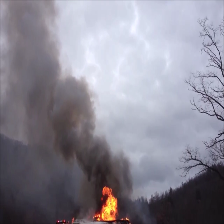

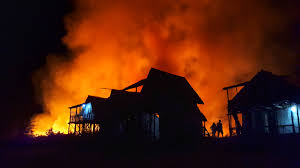

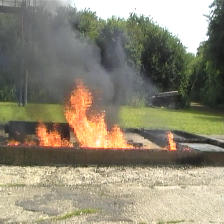

In [5]:
from IPython.display import Image, display

roses = list(data_dir.glob('Fire/*'))

for image_path in roses[:3]:
    display(Image(str(image_path)))

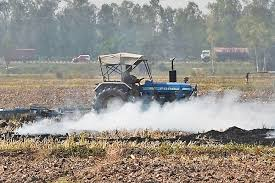

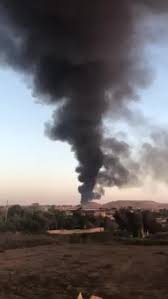

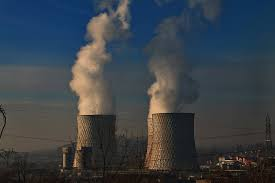

In [6]:
from IPython.display import Image, display

roses = list(data_dir.glob('Smoke/*'))

for image_path in roses[:3]:
   display(Image(str(image_path)))

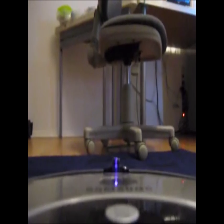

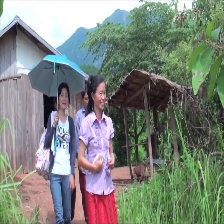

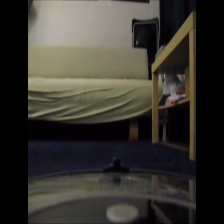

In [7]:
from IPython.display import Image, display

roses = list(data_dir.glob('Neutral/*'))

for image_path in roses[:3]:
    display(Image(str(image_path)))

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

IMAGE_SIZE = 128
BATCH_SIZE = 64
# dataset_dir = '/media/pranjay/New Volume/Study/summerSem2020/Project/Data/TrainingData' #base_dir
dataset_dir = '/data/cmpe256-01-su2020/blaze_sight/tmp_withSmoke'

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
    rescale=1./255, 
    validation_split=0.25)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    shuffle=True,
    subset='training')

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')


Found 4662 images belonging to 3 classes.
Found 1551 images belonging to 3 classes.


In [9]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)

image_batch_train, label_batch_train = next(iter(train_generator))

image_batch_train, label_batch_train = next(iter(train_generator))

Image batch shape:  (64, 128, 128, 3)
Label batch shape:  (64, 3)


In [10]:
print (train_generator.class_indices)

{'Fire': 0, 'Neutral': 1, 'Smoke': 2}


In [11]:
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
print(labels)
with open('labels.txt', 'w') as f:
  f.write(labels)

Fire
Neutral
Smoke


In [12]:
!cat labels.txt

Fire
Neutral
Smoke

In [13]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0])
      plt.axis('off')

In [14]:
print(label_batch_train)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


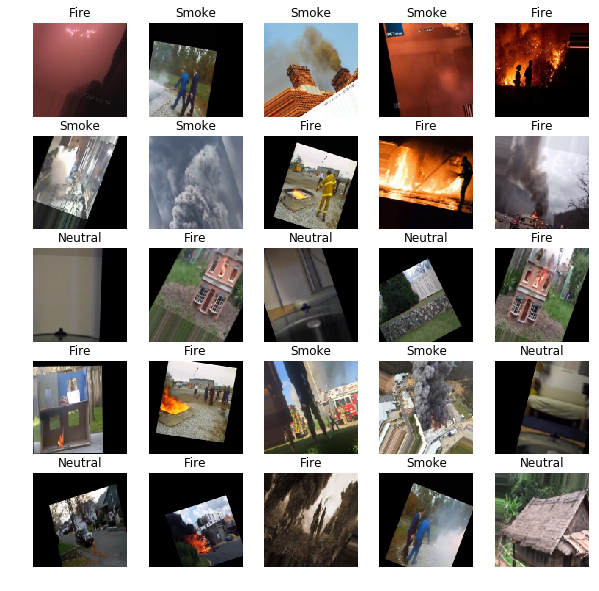

In [15]:
show_batch(image_batch_train, label_batch_train)

In [16]:
#Model0 Direct Paper Implimentation

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import losses

numclasses=train_generator.num_classes

def build_model0():
  model = models.Sequential()
  changeDim = -1
  #Layer1
  model.add(layers.SeparableConv2D(16, (7, 7), activation='relu', padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
  model.add(layers.BatchNormalization(axis=changeDim))
  model.add(layers.MaxPooling2D(2,2))
    
  #Layer2
  model.add(layers.SeparableConv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization(axis=changeDim))
  model.add(layers.MaxPooling2D(2,2))
  
  #Layer3
  model.add(layers.SeparableConv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization(axis=changeDim))
  
  #Layer4
  model.add(layers.SeparableConv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization(axis=changeDim))
  
  #Layer5 MaxPooling
  model.add(layers.MaxPooling2D(2,2))
  
  #First Fully Connected Layer
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
    
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Dense(numclasses, activation='softmax'))

  loss = losses.categorical_crossentropy#losses.sparse_categorical_crossentropy
  #one-hot encoded, use categorical_crossentropy. Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1] But if your Yi's are integers, use sparse_categorical_crossentropy. Examples for above 3-class classification problem: [1] , [2], [3]
  optimizer = optimizers.SGD(lr=0.015, momentum=0.9,decay=0.015/50)#optimizers.RMSprop(lr=1e-4)#optimizers.SGD(lr=0.001) #Adam(lr=0.001)
  model.compile(loss=loss,
              optimizer=optimizer,
              metrics=['acc'])

  return model

In [17]:
model0=build_model0()
model0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 128, 128, 16)      211       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 64, 64, 32)        688       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 32, 32, 64)        2

In [18]:
EPOCHS = 50
history_0 = model0.fit(
      train_generator,
      epochs=EPOCHS,
      validation_data=val_generator)

Train for 73 steps, validate for 25 steps
Epoch 1/50
73/73 [==============================] - 53s 731ms/step - loss: 1.1003 - acc: 0.4850 - val_loss: 1.7661 - val_acc: 0.3417
Epoch 2/50
73/73 [==============================] - 47s 645ms/step - loss: 0.8915 - acc: 0.6000 - val_loss: 1.1891 - val_acc: 0.3778
Epoch 3/50
73/73 [==============================] - 47s 642ms/step - loss: 0.7856 - acc: 0.6650 - val_loss: 1.2226 - val_acc: 0.4113
Epoch 4/50
73/73 [==============================] - 47s 639ms/step - loss: 0.6642 - acc: 0.7375 - val_loss: 1.1216 - val_acc: 0.5364
Epoch 5/50
73/73 [==============================] - 47s 639ms/step - loss: 0.5956 - acc: 0.7718 - val_loss: 0.9473 - val_acc: 0.6132
Epoch 6/50
73/73 [==============================] - 46s 636ms/step - loss: 0.5386 - acc: 0.7986 - val_loss: 1.6374 - val_acc: 0.4500
Epoch 7/50
73/73 [==============================] - 47s 638ms/step - loss: 0.4878 - acc: 0.8211 - val_loss: 1.0454 - val_acc: 0.6351
Epoch 8/50
73/73 [=========

In [19]:
model0.save('/data/cmpe256-01-su2020/blaze_sight/models/sourabh/Model_02', save_format='tf')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /data/cmpe256-01-su2020/blaze_sight/models/sourabh/Model_01/assets


In [20]:
import numpy as np

def draw_evaluation(history):
    N = np.arange(0, len(history.history['loss']))
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(N, history.history["loss"], label="train_loss")
    plt.plot(N, history.history["val_loss"], label="val_loss")
    plt.plot(N, history.history["acc"], label="train_acc")
    plt.plot(N, history.history["val_acc"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")

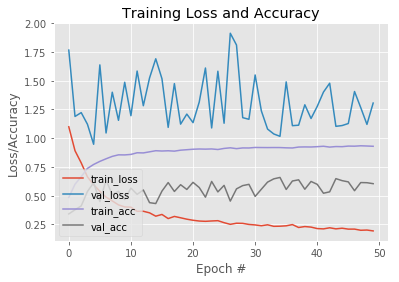

In [21]:
draw_evaluation(history_0)